# Excercise 1 Datasets

Below you are provided with five versions of a dataset in CSV format. Each version has minor modifications that may affect its quality and usability. Your task is to:


Analyze each one to identify if it has common data problems, such as:

Null or missing values.
Imbalance in classes.
Invalid special characters or symbols.
Errors in labels or columns.

Determine which of the datasets is ready to use without additional cleaning.

Answer the following questions about the datasets:
What problem does each dataset have? How would you identify it in Python? How would you fix each error? How would this problem affect a machine learning model? Which dataset is ready to use? Justify your answer.


## Importar librerias

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
import networkx as nx
import heapq  

### First DataSet

In [3]:
dataset1 = pd.read_csv('Data/exm1.csv')
dataset1.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [4]:
dataset1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [5]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


What problem does the dataset have?

Contiene valores tipo "object" en diversas columnas y al examinar dichas columnas son puros signos de interrogación y algunas entradas tienen valores numericos. Por lo que sería necesario examinarla y limpiarla en su totalidad para que pueda llegar a ser funcional. Una observacion es que dicho dataset no contiene valores nulos y contiene algun que otro valor atípico en la columna oldpeak

How would you identify it in Python?

Se utilizaron los comandos head, describe e info que vienen en la librería de pandas. Al analizarlos nos dimos cuenta de los problemas mencionados anteriormente.
 
How would you fix each error? 

Se podrían eliminar las columnas que contengan datos inadecuados ya que no estan aportando nada o preguntar que quería hacer la persona que esta reportando los datos. Para la columna oldpeak se eliminaría dicho dato atípico para que no influencie mucho al modelo.

How would this problem affect a machine learning model?

No se tendría exactamente un modelo preciso para la toma de desiciones bajo estos datos, al giual que si se llegan a eliminar pero se conserva el valor atípico puede hacer gran ruido al momento de entrenar el modelo bajo estos datos.

### Second DataSet

In [6]:
dataset2 = pd.read_csv('Data/exm2.csv')
dataset2.describe()

,age,sex,cp,restecg,oldpeak,num
count,294.000000,271.000000,271.000000,263.000000,276.000000,294.000000
mean,47.826531,0.741697,3.014760,0.212928,0.609783,0.360544
std,7.811812,0.438511,0.962137,0.454309,0.922967,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,0.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,2.000000,5.000000,1.000000


In [7]:
dataset2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1.0,2.0,130,132,0,2.0,185,0,0.0,?,?,?,0
1,29,1.0,2.0,120,243,0,0.0,160,0,0.0,?,?,?,0
2,29,1.0,2.0,140,?,0,0.0,170,0,0.0,?,?,?,0
3,30,0.0,1.0,170,237,0,1.0,170,0,0.0,?,?,6,0
4,31,0.0,2.0,100,219,0,1.0,150,0,0.0,?,?,?,0


In [8]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         271 non-null    float64
 2   cp          271 non-null    float64
 3   trestbps    271 non-null    object 
 4   chol        284 non-null    object 
 5   fbs         281 non-null    object 
 6   restecg     263 non-null    float64
 7   thalach     263 non-null    object 
 8   exang       263 non-null    object 
 9   oldpeak     276 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 32.3+ KB


What problem does the dataset have? 

Algunas columnas del DataSet tienen valores nulos, la columna "chol" es de tipo object por lo que en esta columna hay valores variados y se observa en las primeras 5 filas del DataSet donde hay un signo de interrogación, También se observa que hay valores atípicos en los datos de las columna "restecg" y "oldpeak". 

How would you identify it in Python?
 
Se utilizaron los comandos head, describe e info que vienen en la librería de pandas. Al analizarlos nos dimos cuenta de los problemas mencionados anteriormente.

How would you fix each error?
Se pueden generar valores a traves de los valores no faltantes para cubrir dichos datos faltantes o usando el algoritmo SMOTE, se puede eliminar las columnas que no contienen datos que no aportan nada al DataSet o investigar que significan los signos de interrogación para darles un valor númerico. En los valores atípicos se pueden eliminar dichas observaciones.

How would this problem affect a machine learning model?
 
Haría que nuestro modelo no fuera preciso al momento de entrenarlo, se obtendrían algunos problemas al momento de realizar el entrenamiento por la incosistencia de los datos presentados en el DataSet.

Which dataset is ready to use? 

El DataSet no esta listo para usarse
 

## Third DataSet

In [9]:
dataset3 = pd.read_csv('Data/exm3.csv')
dataset3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.0,294.000000,294.000000
mean,47.826531,3402.085034,71.003401,213.425170,357.431973,0.078231,0.224490,196.326531,0.302721,0.586054,146.500000,0.0,-81.900000,0.360544
std,7.811812,58321.141956,1166.249918,977.285035,1823.852372,0.268993,0.471667,983.635506,0.460219,0.908648,85.014705,0.0,51.009064,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.0,-169.800000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,73.250000,0.0,-125.850000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,241.500000,0.000000,0.000000,140.000000,0.000000,0.000000,146.500000,0.0,-81.900000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,281.000000,0.000000,0.000000,155.000000,1.000000,1.000000,219.750000,0.0,-37.950000,1.000000
max,66.000000,1000000.000000,20000.000000,12000.000000,31500.000000,1.000000,2.000000,17000.000000,1.000000,5.000000,293.000000,0.0,6.000000,1.000000


In [10]:
dataset3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,0,0,6.0,0
1,29,1,2,120,243,0,0,160,0,0.0,1,0,6.0,0
2,29,1,2,140,243,0,0,17000,0,0.0,2,0,3.0,0
3,30,0,1,170,237,0,1,170,0,0.0,3,0,6.0,0
4,31,0,2,100,219,0,1,150,0,0.0,4,0,3.0,0


In [11]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    int64  
 4   chol        294 non-null    int64  
 5   fbs         294 non-null    int64  
 6   restecg     294 non-null    int64  
 7   thalach     294 non-null    int64  
 8   exang       294 non-null    int64  
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    int64  
 11  ca          294 non-null    int64  
 12  thal        294 non-null    float64
 13  num         294 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 32.3 KB


What problem does the dataset have? 

A diferencia de los demás DataSets en este DataSet no se encuentra ningun valor tipo NaN o Nulo, pero se observan muchos valores atípicos en diferentes columnas como lo es: "sex", "cp", "trestbps", "chol","thalach", "oldpeak" y slope y en especial en aquellas columnas que tienenuna varianza muy grande.

How would you identify it in Python?

Se utilizaron los comandos head, describe e info que vienen en la librería de pandas. Al analizarlos nos dimos cuenta de los problemas mencionados anteriormente.
 
How would you fix each error? 

Se podrá eliminar las columnas que contienen valores atípicos y de esta forma se podría usar el DataSet.

How would this problem affect a machine learning model?

No podría el modelo dar desiciones acertadas dado que se ha entrenado con valores atípicos y los resultados no podrían ser los optimos

## Fourth DataSet

In [14]:
dataset4 = pd.read_csv('Data/exm4.csv')
dataset4.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.0,294.000000,294.000000
mean,47.826531,0.727891,2.982993,132.608844,251.360544,0.078231,0.224490,139.081633,0.302721,0.586054,146.500000,0.0,-81.900000,0.360544
std,7.811812,0.445804,0.965117,17.601778,71.086156,0.268993,0.471667,23.563873,0.460219,0.908648,85.014705,0.0,51.009064,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.0,-169.800000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,73.250000,0.0,-125.850000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,241.500000,0.000000,0.000000,140.000000,0.000000,0.000000,146.500000,0.0,-81.900000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,281.000000,0.000000,0.000000,155.000000,1.000000,1.000000,219.750000,0.0,-37.950000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,293.000000,0.0,6.000000,1.000000


In [7]:
dataset4.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,0,0,6.0,0
1,29,1,2,120,243,0,0,160,0,0.0,1,0,6.0,0
2,29,1,2,140,243,0,0,170,0,0.0,2,0,3.0,0
3,30,0,1,170,237,0,1,170,0,0.0,3,0,6.0,0
4,31,0,2,100,219,0,1,150,0,0.0,4,0,3.0,0


In [8]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    int64  
 4   chol        294 non-null    int64  
 5   fbs         294 non-null    int64  
 6   restecg     294 non-null    int64  
 7   thalach     294 non-null    int64  
 8   exang       294 non-null    int64  
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    int64  
 11  ca          294 non-null    int64  
 12  thal        294 non-null    float64
 13  num         294 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 32.3 KB


What problem does the dataset have?

La columna "chol" puede ser que tenga valores atípicos ya que su valor máximo es un poco discrepante con el dato mostado en el percentil 75 pero su varianza no muestra ser tan alta, por lo que esto puede estar modelando un fenomeno interesante y no debe de ser descartado hasta que se analice con profundidad.

How would you identify it in Python?

Se utilizaron los comandos head, describe e info que vienen en la librería de pandas. Al analizarlos nos dimos cuenta que todo esta perfecto a excepción de dicho problema.
 
How would you fix each error? 

Se podría realizar una gráfica de barras para observar la distribución de los datos de la columna "chol" para ver si crecen al final o dicho dato máximo es un dato atípico. Con ello se podría decidir si conservalo o eliminarlo.

How would this problem affect a machine learning model?

Con este dataSet se podría trabajar si se determina si dicho valor atípico pertenece o no a la explicacion del fenomeno. En caso de usar dicho DataSet y estar equivocados es probable que los resultados puedan diferir un poco de la realidad por dicho dato atípico.

Es el mejor DataSet hasta el momento

## Fifth DataSet

In [22]:
dataset5 = pd.read_csv('Data/exm5.csv')
dataset5.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.642857,247.476190,0.068027,0.217687,139.081633,0.302721,0.586054,0.360544
std,7.811812,0.447533,0.965117,17.625755,66.964851,0.252222,0.460257,23.563873,0.460219,0.908648,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,205.250000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,238.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,278.500000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


In [11]:
dataset5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    int64  
 4   chol        294 non-null    int64  
 5   fbs         294 non-null    int64  
 6   restecg     294 non-null    int64  
 7   thalach     294 non-null    int64  
 8   exang       294 non-null    int64  
 9   oldpeak     294 non-null    float64
 10  num         294 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 25.4 KB


In [13]:
dataset5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,245,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


What problem does the dataset have?

No contiene valores nulos y sus datos parecen bien, no obstante en la columna "chol" se puede observar como un valor atípico dado que su valor máximo esta muy alejado de su percentil 75. 

How would you identify it in Python?

Se utilizaron los comandos head, describe e info que vienen en la librería de pandas. Al analizarlos nos dimos cuenta de dicho problema
 
How would you fix each error? 

Generar una gráfica donde se muestre si es parte de la descripción del fenomeno o fue un dato atípico, en caso de ser un dato atípico sería eliminar dicho dato.

How would this problem affect a machine learning model?

Podría dar valores un poco alejados de la realidad en caso de que sea un valor atípico.

### A continuación se hace una gráfica para conocer el mejor DataSet

(array([  5.,  37., 104.,  93.,  36.,   9.,   2.,   3.,   3.,   2.]),
 array([ 85. , 136.8, 188.6, 240.4, 292.2, 344. , 395.8, 447.6, 499.4,
        551.2, 603. ]),
 <BarContainer object of 10 artists>)

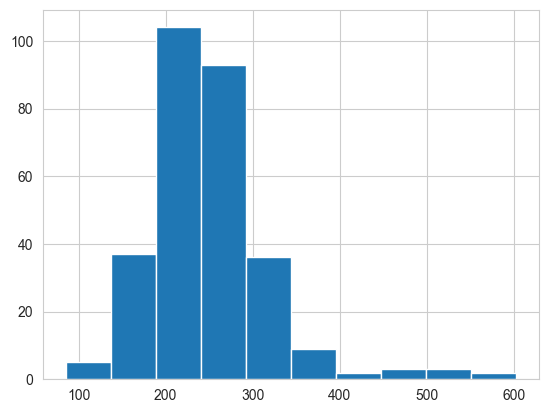

In [24]:
plt.hist(dataset4['chol'])

(array([  6.,  36., 108.,  92.,  35.,   9.,   2.,   3.,   2.,   1.]),
 array([ 85. , 136.8, 188.6, 240.4, 292.2, 344. , 395.8, 447.6, 499.4,
        551.2, 603. ]),
 <BarContainer object of 10 artists>)

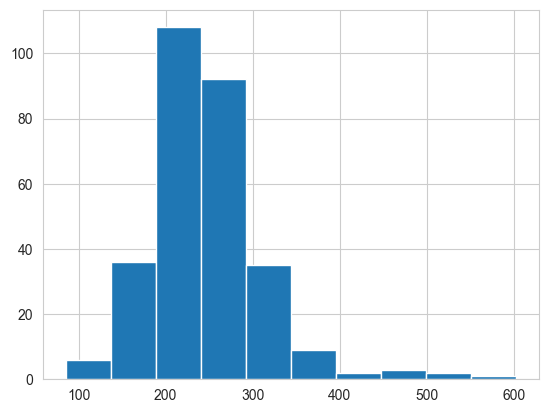

In [25]:
plt.hist(dataset5['chol'])

Con base en las gráficas se observa que el mejor dataSet es el dataset4, ya que hay más datos cercanos a el valor máximo y puede ser que modele un fenomeno interesante, mientras que el dataset5 representa casi lo mismo pero tiene menos observaciones en ese rango haciendo que tal vez pueda ser un error.

## Excercise 2 Metrics

### Ejercicio 1

Case 1: Speech Recognition in Virtual Assistants
What does it do? An AI model transcribes voice commands for a virtual assistant.
Model Metrics:

•	Precision: 0.87

•	Recall: 0.83

•	Accuracy: 0.90

•	F1-score: 0.85

•	Confusion Matrix:

•			        Pred. Correct		Pred. Incorrect

•	Actual Correct		420		                80

•	Actual Inorrect		40		                460



### Respuesta

Precisión: Tiene un valor de 0.87, o sea de 87%, podemos decir que el modelo tiene un buen rendimiento en términos de evitar errores al obtener comandos de voz.

Recall:  Significa que el modelo identifica correctamente el 83% de los comandos de voz.

Accuracy: El modelo acierta en el 90% de los casos.

F1-score: Tiene un valor de 0.85 que es aceptable, ya que no sacrfica mucho ni el recall ni la accuracy.

En la matriz de confusión se observa lo siguiente:

Falsos negativos (80): Estos son comandos válidos que el modelo no reconoció. Esto podría ser problemático si el asistente virtual ignora comandos importantes como podría ser llamar a la policia en situaciones urgentes. Es mucho que no reconozca 80 comandos. Por lo que es un indicador importante para evaluar el modelo.

Falsos positivos (40): Estos son comandos incorrectos que el modelo aceptó como válidos. Esto podría llevar a acciones no deseadas, esto podría llegar a ser molesto para el usuario pero no es tan grave como los falsos negativos.

### Ejercicio 2

Case 2: Predicting Failures in Industrial Machinery
What does it do? A predictive maintenance model forecasts whether a machine will fail within the next 7 days.


Model Metrics:

•	Precision: 0.80

•	Recall: 0.70

•	Accuracy: 0.85

•	F1-score: 0.75

•	Confusion Matrix:
•			Pred. Correct	•	Pred. Incorrect

•	Actual Correct	•	140	•	60

•	Actual Inorrect	•	90	•	710


### Respuesta

Precisión: Cuando el modelo predice un fallo el 80% de las veces es correcto, por lo que es bastante aceptable.

Recall: El modelo identifica correctamente el 70% de los fallos reales y esto no es tan bueno para la tarea que va a realizar porque sería todo el tiempo comprar una máquina aunque esta siga funcionando.

Accuracy: El modelo acierta en el 85%  pero en problemas de mantenimiento predictivo, la exactitud puede ser engañosa. Por lo que preferimos otras metricas.

F1-score: El .75 es un valor que indica que el modelo tiene un equilibrio deficiente entre precisión y recall. 

Matriz de confusión:

Falsos negativos (60):Esto es alarmante, ya que podría llevar a fallos inesperados en la maquinaria

Falsos positivos (90): Esto podría llevar a un mantenimiento innecesario, lo que aumenta los costos operativos.

### Ejercicio 3

Case 3: Product Recommendation in an Online Store
What does it do? A recommendation system suggests products based on user purchase history.
Model Metrics:

•	Precision: 0.78

•	Recall: 0.65

•	Accuracy: 0.80

•	F1-score: 0.71


•	Confusion Matrix:

•	Pred. Correct	•	Pred. Incorrect

•	Actual Correct	•	260	•	140

•	Actual Inorrect	•	110	•	690

### Respuesta

Precisión:  El 78% de las recomendaciones del modelo son correctas, lo que sugiere que el modelo no recomienda muchos productos que el usuario no compraría.

Recall :  El modelo identifica correctamente el 65% de los productos que el usuario compraría, es un valor bastante bajo ya que podría resultar en oportunidades perdidas de ventas.

Accuracy:  El modelo acierta en el 80% de los casos, lo que significa que esta realizando en general buenas recomendaciones.

F1-score: El valor de 0.71 es deficiente, lo que indica que el modelo carece un poco de equilibrio entre precisión y recall

De la matriz de confusión:

Falsos negativos (140):Estos son productos que el usuario compraría pero que el modelo no recomendó. Esto representa oportunidades perdidas de ventas.

Falsos positivos (110):Estos son productos que el usuario no compraría pero que el modelo recomendó. Esto podría llevar a una mala experiencia y aumentaría los costos ya que se muestran cosas que no interesan a la gente perdiendo dichi espacio.

Algo curioso es que el modelo identificó correctamente 690 productos que el usuario no compraría e identifico 260 productos que el usuario compraría, por lo que parece que esta diseñado para identificar productos que no compraria el usuario.

# Excercise 3 Searches

Searching a communication network graph.

Problem description.

We have a directed graph that represents a communication network between servers. Each node represents a server, and each edge represents a connection with an associated cost (transmission time in milliseconds). The objective is to find the optimal route from a start server to a destination server using search algorithms


In [32]:
def read_graph(file_path):
    graph = {}
    with open(file_path, 'r') as file:
        for line in file:
            node1, node2, cost = line.strip().split()
            cost = int(cost)
            if node1 not in graph:
                graph[node1] = []
            graph[node1].append((node2, cost))
    return graph

def visualize_graph(graph):
    # Crear un grafo dirigido (o no dirigido, según sea necesario)
    G = nx.Graph()

    # Agregar nodos y aristas con sus costos
    for node, edges in graph.items():
        for edge in edges:
            neighbor, cost = edge
            G.add_edge(node, neighbor, weight=cost)

    # Dibujar el grafo
    pos = nx.spring_layout(G)  # Posiciones de los nodos
    labels = nx.get_edge_attributes(G, 'weight')  # Obtener los costos de las aristas

    # Dibujar nodos y aristas
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)  # Mostrar los costos

    # Mostrar el grafo
    plt.title("Visualización del Grafo")
    plt.axis('off')  # Desactivar ejes
    plt.show()
    
graph = read_graph("Data/examenGrafo.txt")

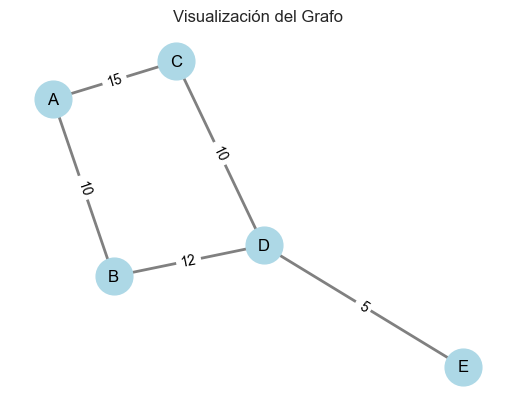

BFS - Path: ['A', 'B', 'D', 'E'], Cost: 27
DFS - Path: ['A', 'C', 'D', 'E'], Cost: 30
UCS - Path: ['A', 'B', 'D', 'E'], Cost: 27


In [33]:
def bfs(graph, start, goal):
    queue = deque([(start, [start], 0)])
    while queue:
        node, path, cost = queue.popleft()
        if node == goal:
            return path, cost
        for neighbor, edge_cost in graph.get(node, []):
            if neighbor not in path:
                queue.append((neighbor, path + [neighbor], cost + edge_cost))
    return None, float('inf')

def dfs(graph, start, goal):
    stack = [(start, [start], 0)]
    while stack:
        node, path, cost = stack.pop()
        if node == goal:
            return path, cost
        for neighbor, edge_cost in graph.get(node, []):
            if neighbor not in path:
                stack.append((neighbor, path + [neighbor], cost + edge_cost))
    return None, float('inf')

def ucs(graph, start, goal):
    priority_queue = [(0, start, [start])]
    visited = {}
    while priority_queue:
        cost, node, path = heapq.heappop(priority_queue)
        if node in visited and visited[node] <= cost:
            continue
        visited[node] = cost
        if node == goal:
            return path, cost
        for neighbor, edge_cost in graph.get(node, []):
            heapq.heappush(priority_queue, (cost + edge_cost, neighbor, path + [neighbor]))
    return None, float('inf')

start_node = "A"
goal_node = "E"

visualize_graph(graph)

for search_algo, name in [(bfs, "BFS"), (dfs, "DFS"), (ucs, "UCS")]:
    path, cost = search_algo(graph, start_node, goal_node)
    print(f"{name} - Path: {path}, Cost: {cost}")

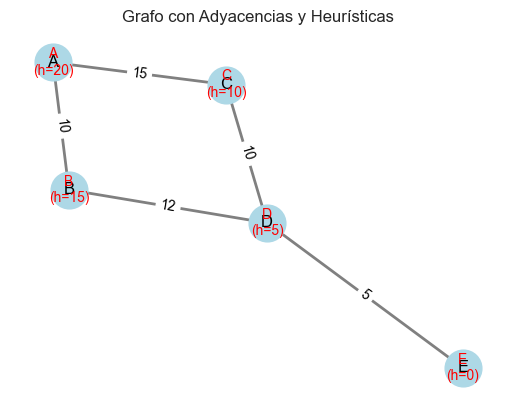

A* Graph Search Path: ['A', 'B', 'D', 'E']
Costo total: 27


In [40]:
def read_heuristic(file_path):
    heuristic = {}
    with open(file_path, 'r') as f:
        for line in f:
            node, _, value = line.strip().split()
            heuristic[node] = int(value)
    return heuristic

def visualize_graph_with_heuristic(graph, heuristic):
    # Crear un grafo dirigido o no dirigido
    G = nx.Graph()

    # Agregar nodos y aristas con sus costos
    for node, edges in graph.items():
        for neighbor, cost in edges:
            G.add_edge(node, neighbor, weight=cost)

    # Dibujar el grafo
    pos = nx.spring_layout(G)  # Posiciones de los nodos
    edge_labels = nx.get_edge_attributes(G, 'weight')  # Obtener los costos de las aristas

    # Dibujar nodos y aristas
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Mostrar los costos

    # Mostrar los valores heurísticos en los nodos
    node_labels = {node: f"{node}\n(h={heuristic[node]})" for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='red')

    # Mostrar el grafo
    plt.title("Grafo con Adyacencias y Heurísticas")
    plt.axis('off')  # Desactivar ejes
    plt.show()

def a_star_graph_search(graph, start, goal, heuristic):
    # Inicializar la cola de prioridad con el nodo inicial
    frontier = []
    heapq.heappush(frontier, (0 + heuristic[start], start))  # f = g + h (g=0 al inicio)
    
    # Diccionarios para rastrear el camino y los costos acumulados
    came_from = {}  # Para reconstruir el camino
    cost_so_far = {start: 0}  # Costo real acumulado (g)
    
    while frontier:
        # Extraer el nodo con el menor costo estimado (f = g + h)
        current_priority, current_node = heapq.heappop(frontier)
        
        # Si llegamos al objetivo, reconstruir el camino
        if current_node == goal:
            path = []
            total_cost = cost_so_far[current_node]  # Costo real acumulado
            while current_node:
                path.append(current_node)
                current_node = came_from.get(current_node)
            return path[::-1], total_cost  # Retornar el camino y el costo real
        
        # Explorar los vecinos del nodo actual
        for neighbor, cost in graph.get(current_node, []):
            new_cost = cost_so_far[current_node] + cost  # g = g_actual + costo_arista
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic[neighbor]  # f = g + h
                heapq.heappush(frontier, (priority, neighbor))
                came_from[neighbor] = current_node
    
    return None, None  # No se encontró un camino

graph = read_graph('Data/examenGrafo.txt')
heuristic = read_heuristic('Data/ExamenHeuristica.txt')

visualize_graph_with_heuristic(graph, heuristic)

# Encontrar el camino de 'A' a 'E' usando la búsqueda A*
path, cost = a_star_graph_search(graph, 'A', 'E', heuristic)
if path:
    print("A* Graph Search Path:", path)
    print("Costo total:", cost)
else:
    print("No se encontró un camino.")